In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


DATA_PATH = "./data/D1/tg_raw.csv"

data = pd.read_csv(DATA_PATH)
data

,SMILES,tg
0,*C*,-54.0
1,*CC(*)C,-3.0
2,*CC(*)CC,-24.1
3,*CC(*)CCC,-37.0
4,*CC(*)C(C)C,60.0
...,...,...
7169,*CC(*)(F)C(=O)OCCC,62.0
7170,*CC(F)(F)C1(F)C(*)CC(O)(C(F)(F)F)C1(F)F,152.0
7171,*CC(F)(F)C1(F)CC(CC(O)(C(F)(F)F)C(F)(F)F)CC1*,98.0
7172,*CC(F)(F)C1(F)CC(C(O)(C(F)(F)F)C(F)(F)F)CC1*,118.0


In [2]:
data["tg"].describe()

count    7174.000000
mean      141.948090
std       112.178143
min      -139.000000
25%        55.000000
50%       134.000000
75%       231.000000
max       495.000000
Name: tg, dtype: float64

In [3]:
data["SMILES"].apply(lambda x: len(x)).describe()

count    7174.000000
mean       63.467103
std        35.174694
min         3.000000
25%        35.000000
50%        59.000000
75%        85.000000
max       314.000000
Name: SMILES, dtype: float64

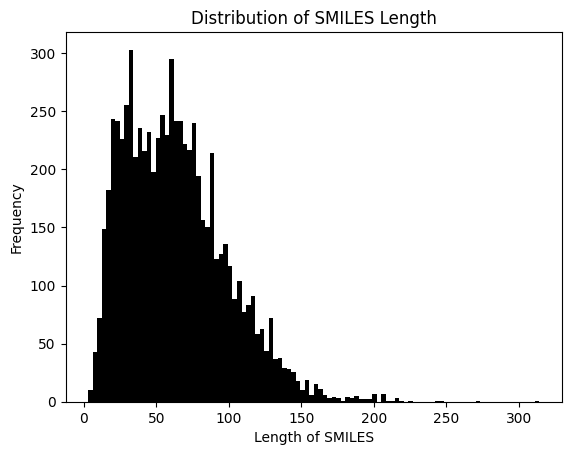

In [4]:
smiles_length = data["SMILES"].apply(lambda x: len(x))
smiles_length.hist(bins=100, color="#000")
plt.xlabel("Length of SMILES")
plt.ylabel("Frequency")
plt.title("Distribution of SMILES Length")
plt.grid(alpha=0)
plt.show()

In [5]:
data["SMILES"]

0                                                 *C*
1                                             *CC(*)C
2                                            *CC(*)CC
3                                           *CC(*)CCC
4                                         *CC(*)C(C)C
                            ...                      
7169                               *CC(*)(F)C(=O)OCCC
7170          *CC(F)(F)C1(F)C(*)CC(O)(C(F)(F)F)C1(F)F
7171    *CC(F)(F)C1(F)CC(CC(O)(C(F)(F)F)C(F)(F)F)CC1*
7172     *CC(F)(F)C1(F)CC(C(O)(C(F)(F)F)C(F)(F)F)CC1*
7173                      *CC(*)(F)C(=O)OCC(Cl)(Cl)Cl
Name: SMILES, Length: 7174, dtype: object

In [6]:
from collections import Counter


unique_chars = set()
for smiles in data["SMILES"]:
    unique_chars.update(set(smiles))

unique_chars = sorted(list(unique_chars))
print(f"There are {len(unique_chars)} unique characters in SMILES")


all_chars = "".join(data["SMILES"].dropna())
char_counts = Counter(all_chars)

# Convert to DataFrame for better visualization
char_counts_df = pd.DataFrame(char_counts.items(), columns=["Character", "Count"])
char_counts_df = char_counts_df.sort_values(by="Count", ascending=True)
char_counts_df.head()

There are 47 unique characters in SMILES


,Character,Count
46,K,1
41,L,1
45,T,1
42,d,2
44,Z,2


In [9]:
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pandas as pd


def encode_smiles(smiles_string):

    bitsize = 1024

    mol = Chem.MolFromSmiles(smiles_string)
    if mol is None:
        print("Invalid SMILES string.")
        return np.zeros(bitsize)

    fingerprint = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=bitsize)
    fingerprint_array = np.array(fingerprint).reshape(-1, 1)

    encoder = OneHotEncoder(sparse_output=False)
    encoded_fingerprint = encoder.fit_transform(fingerprint_array)

    return pd.DataFrame(encoded_fingerprint).T.iloc[1].values

In [10]:
smiles_string = "*CC(C(=O)OCC(C(C(F)(F)F)(F)F)(F)F)(F)*"
df = encode_smiles(smiles_string)
df

[20:49:47] DEPRECATION WARNING: please use MorganGenerator


array([0., 0., 0., ..., 0., 0., 0.], shape=(1024,))

In [11]:
features_list = []
for smiles in data["SMILES"]:
    features_list.append(encode_smiles(smiles))

features = pd.DataFrame(features_list)
features.columns = [f"F{col}" for col in features.columns]
features

[20:50:20] DEPRECATION WARNING: please use MorganGenerator
[20:50:20] DEPRECATION WARNING: please use MorganGenerator
[20:50:20] DEPRECATION WARNING: please use MorganGenerator
[20:50:20] DEPRECATION WARNING: please use MorganGenerator
[20:50:20] DEPRECATION WARNING: please use MorganGenerator
[20:50:20] DEPRECATION WARNING: please use MorganGenerator
[20:50:20] DEPRECATION WARNING: please use MorganGenerator
[20:50:20] DEPRECATION WARNING: please use MorganGenerator
[20:50:20] DEPRECATION WARNING: please use MorganGenerator
[20:50:20] DEPRECATION WARNING: please use MorganGenerator
[20:50:20] DEPRECATION WARNING: please use MorganGenerator
[20:50:20] DEPRECATION WARNING: please use MorganGenerator
[20:50:20] DEPRECATION WARNING: please use MorganGenerator
[20:50:20] DEPRECATION WARNING: please use MorganGenerator
[20:50:20] DEPRECATION WARNING: please use MorganGenerator
[20:50:20] DEPRECATION WARNING: please use MorganGenerator
[20:50:20] DEPRECATION WARNING: please use MorganGenerat

,F0,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F1014,F1015,F1016,F1017,F1018,F1019,F1020,F1021,F1022,F1023
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7169,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7170,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7172,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [15]:
features.sum(axis="rows").sort_values(ascending=False)

F226    7174.0
F356    5921.0
F849    5838.0
F726    5643.0
F650    5562.0
         ...  
F883       7.0
F464       7.0
F776       6.0
F921       5.0
F613       4.0
Length: 1024, dtype: float64

In [16]:
processed_data = pd.concat([data, features], axis=1)
processed_data

,SMILES,tg,F0,F1,F2,F3,F4,F5,F6,F7,...,F1014,F1015,F1016,F1017,F1018,F1019,F1020,F1021,F1022,F1023
0,*C*,-54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,*CC(*)C,-3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,*CC(*)CC,-24.1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,*CC(*)CCC,-37.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,*CC(*)C(C)C,60.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7169,*CC(*)(F)C(=O)OCCC,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7170,*CC(F)(F)C1(F)C(*)CC(O)(C(F)(F)F)C1(F)F,152.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7171,*CC(F)(F)C1(F)CC(CC(O)(C(F)(F)F)C(F)(F)F)CC1*,98.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7172,*CC(F)(F)C1(F)CC(C(O)(C(F)(F)F)C(F)(F)F)CC1*,118.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [17]:
processed_data = processed_data.dropna(subset=["tg"])
processed_data.reset_index(drop=True, inplace=True)
processed_data

,SMILES,tg,F0,F1,F2,F3,F4,F5,F6,F7,...,F1014,F1015,F1016,F1017,F1018,F1019,F1020,F1021,F1022,F1023
0,*C*,-54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,*CC(*)C,-3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,*CC(*)CC,-24.1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,*CC(*)CCC,-37.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,*CC(*)C(C)C,60.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7169,*CC(*)(F)C(=O)OCCC,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7170,*CC(F)(F)C1(F)C(*)CC(O)(C(F)(F)F)C1(F)F,152.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7171,*CC(F)(F)C1(F)CC(CC(O)(C(F)(F)F)C(F)(F)F)CC1*,98.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7172,*CC(F)(F)C1(F)CC(C(O)(C(F)(F)F)C(F)(F)F)CC1*,118.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [18]:
X = processed_data.drop(columns=["SMILES", "tg"])
X

,F0,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F1014,F1015,F1016,F1017,F1018,F1019,F1020,F1021,F1022,F1023
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7169,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7170,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7172,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [19]:
y = processed_data["tg"]
y

0       -54.0
1        -3.0
2       -24.1
3       -37.0
4        60.0
        ...  
7169     62.0
7170    152.0
7171     98.0
7172    118.0
7173    127.0
Name: tg, Length: 7174, dtype: float64

R2 Score: 0.8845638297943829
Mean Squared Error: 1424.51012512488
Root Mean Squared Error: 37.74268306738248


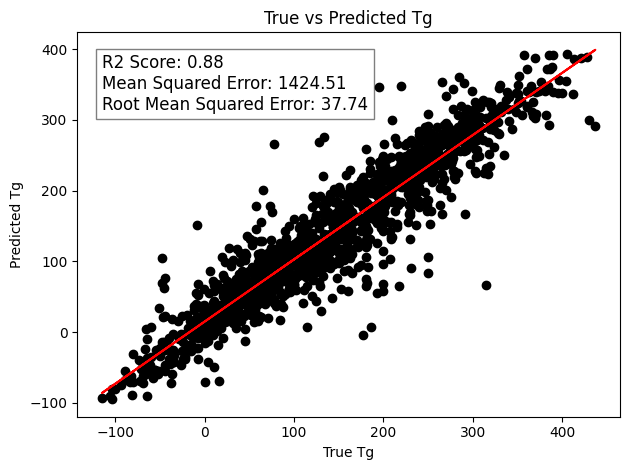

In [26]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=24
)


model = XGBRegressor(n_estimators=100, max_depth=10, learning_rate=0.1, n_jobs=-1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"R2 Score: {r2}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

plt.scatter(y_test, y_pred, color="black")
plt.xlabel("True Tg")
plt.ylabel("Predicted Tg")
plt.title("True vs Predicted Tg")

# regression line
z = np.polyfit(y_test, y_pred, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color="red")

# Define the text content
metrics_text = (
    f"R2 Score: {r2:.2f}\n"
    f"Mean Squared Error: {mse:.2f}\n"
    f"Root Mean Squared Error: {rmse:.2f}"
)

# Automatically position it in the top-left corner
plt.text(
    min(y_test),
    max(y_pred),  # Dynamically set top-left position
    metrics_text,
    fontsize=12,
    verticalalignment="top",
    horizontalalignment="left",
    bbox=dict(facecolor="white", alpha=0.5),  # Background for readability
)


plt.grid(alpha=0)
plt.tight_layout()
plt.show()

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize model
model = XGBRegressor(n_estimators=100, max_depth=10, learning_rate=0.1, n_jobs=-1)

# Perform 10-fold cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=24)
r2_scores = cross_val_score(model, X, y, scoring="r2", cv=cv, n_jobs=-1)
mse_scores = -cross_val_score(
    model, X, y, scoring="neg_mean_squared_error", cv=cv, n_jobs=-1
)
rmse_scores = np.sqrt(mse_scores)

# Compute mean and std for stability
r2_mean, r2_std = r2_scores.mean(), r2_scores.std()
mse_mean, mse_std = mse_scores.mean(), mse_scores.std()
rmse_mean, rmse_std = rmse_scores.mean(), rmse_scores.std()

print(f"R2 Score: {r2_mean:.2f} ± {r2_std:.2f}")
print(f"Mean Squared Error: {mse_mean:.2f} ± {mse_std:.2f}")
print(f"Root Mean Squared Error: {rmse_mean:.2f} ± {rmse_std:.2f}")

R2 Score: 0.89 ± 0.01
Mean Squared Error: 1433.33 ± 109.99
Root Mean Squared Error: 37.83 ± 1.46


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from tqdm import tqdm


# Define hyperparameter space
param_dist = {
    "n_estimators": [100, 200, 300, 400, 500],
    "max_depth": [3, 5, 7, 10, 12],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "gamma": [0, 0.1, 0.2, 0.3],
    "reg_alpha": [0, 0.01, 0.1, 1],
    "reg_lambda": [0.1, 1, 10],
}

# Define outer cross-validation loop (testing performance)
outer_cv = KFold(n_splits=10, shuffle=True, random_state=24)

r2_scores = []
mse_scores = []

for train_idx, test_idx in tqdm(outer_cv.split(X), total=outer_cv.get_n_splits()):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Inner CV for hyperparameter tuning
    model = XGBRegressor(n_jobs=-1)
    inner_cv = KFold(n_splits=3, shuffle=True, random_state=24)

    random_search = RandomizedSearchCV(
        model,
        param_distributions=param_dist,
        n_iter=20,
        scoring="r2",
        cv=inner_cv,
        verbose=2,
        random_state=24,
        n_jobs=1,
    )

    # Fit model with best hyperparameters on training fold
    random_search.fit(X_train, y_train)
    best_model = random_search.best_estimator_

    # Evaluate on test fold
    y_pred = best_model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    r2_scores.append(r2)
    mse_scores.append(mse)

# Compute mean and std for stability
r2_mean, r2_std = np.mean(r2_scores), np.std(r2_scores)
mse_mean, mse_std = np.mean(mse_scores), np.std(mse_scores)

print(f"\nFinal Nested CV Results:")
print(f"R2 Score: {r2_mean:.4f} ± {r2_std:.4f}")
print(f"Mean Squared Error: {mse_mean:.4f} ± {mse_std:.4f}")

  0%|          | 0/5 [00:00<?, ?it/s]

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=12, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=  14.4s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=12, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=  15.3s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=12, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=  14.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=400, reg_alpha=0.1, reg_lambda=0.1, subsample=1.0; total time=   5.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=400, reg_alpha=0.1, reg_lambda=0.1, subsample=1.0; total time=   6.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=400, reg_alpha=0.1, reg_lambda=0.1, subsample=1.0; total time=   5.3s
[CV] END 

 20%|██        | 1/5 [06:37<26:29, 397.42s/it]

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=12, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=  15.4s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=12, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=  15.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=12, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=  13.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=400, reg_alpha=0.1, reg_lambda=0.1, subsample=1.0; total time=   6.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=400, reg_alpha=0.1, reg_lambda=0.1, subsample=1.0; total time=   5.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=400, reg_alpha=0.1, reg_lambda=0.1, subsample=1.0; total time=   6.9s
[CV] END 

 40%|████      | 2/5 [12:16<18:09, 363.28s/it]

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=12, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=  13.3s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=12, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=  13.5s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=12, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=  14.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=400, reg_alpha=0.1, reg_lambda=0.1, subsample=1.0; total time=   5.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=400, reg_alpha=0.1, reg_lambda=0.1, subsample=1.0; total time=   5.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=400, reg_alpha=0.1, reg_lambda=0.1, subsample=1.0; total time=   5.2s
[CV] END 

 60%|██████    | 3/5 [17:13<11:06, 333.07s/it]

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=12, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=  10.6s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=12, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=  10.6s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=12, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=  11.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=400, reg_alpha=0.1, reg_lambda=0.1, subsample=1.0; total time=   4.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=400, reg_alpha=0.1, reg_lambda=0.1, subsample=1.0; total time=   4.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=400, reg_alpha=0.1, reg_lambda=0.1, subsample=1.0; total time=   4.5s
[CV] END 

 80%|████████  | 4/5 [21:56<05:13, 313.31s/it]

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=12, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=  11.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=12, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=  11.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=12, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=  11.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=400, reg_alpha=0.1, reg_lambda=0.1, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=400, reg_alpha=0.1, reg_lambda=0.1, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=400, reg_alpha=0.1, reg_lambda=0.1, subsample=1.0; total time=   4.3s
[CV] END 

100%|██████████| 5/5 [26:37<00:00, 319.58s/it]


Final Nested CV Results:
R2 Score: 0.8898 ± 0.0069
Mean Squared Error: 1384.2935 ± 59.0806


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

param_dist = {
    "n_estimators": [100, 200, 300, 400, 500],
    "max_depth": [3, 5, 7, 10, 12],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "gamma": [0, 0.1, 0.2, 0.3],
    "reg_alpha": [0, 0.01, 0.1, 1],
    "reg_lambda": [0.1, 1, 10],
}

model = XGBRegressor(n_jobs=-1)

cv = KFold(n_splits=10, shuffle=True, random_state=24)
random_search = RandomizedSearchCV(
    model,
    param_distributions=param_dist,
    n_iter=20,
    scoring="r2",
    cv=cv,
    verbose=2,
    random_state=24,
    n_jobs=1,
)

random_search.fit(X, y)
best_model = random_search.best_estimator_

print(f"Best Model: {best_model}")

Fitting 10 folds for each of 20 candidates, totalling 200 fits
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=12, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=  18.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=12, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=  16.3s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=12, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=  15.7s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=12, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=  17.5s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=12, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=  15.4s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=12, n_estimators=500, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=  18.0s
[CV] END cols

KeyboardInterrupt: 

[CV] END .................................................... total time=  12.2s
[CV] END .................................................... total time=  11.3s
[CV] END .................................................... total time=  11.0s
[CV] END .................................................... total time=  11.2s
[CV] END .................................................... total time=  12.5s
[CV] END .................................................... total time=  11.8s
[CV] END .................................................... total time=  10.8s
[CV] END .................................................... total time=  10.7s
[CV] END .................................................... total time=  10.8s
[CV] END .................................................... total time=  11.0s
[CV] END .................................................... total time=  10.9s
[CV] END .................................................... total time=   9.9s
[CV] END ...................

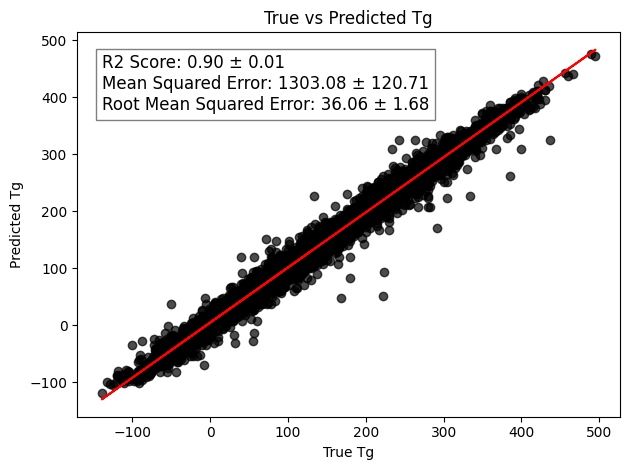

In [30]:
r2_scores = cross_val_score(
    best_model,
    X,
    y,
    scoring="r2",
    cv=cv,
    n_jobs=1,
    verbose=2,
)
mse_scores = -cross_val_score(
    best_model,
    X,
    y,
    scoring="neg_mean_squared_error",
    cv=cv,
    n_jobs=1,
    verbose=2,
)
rmse_scores = np.sqrt(mse_scores)

r2_mean, r2_std = r2_scores.mean(), r2_scores.std()
mse_mean, mse_std = mse_scores.mean(), mse_scores.std()
rmse_mean, rmse_std = rmse_scores.mean(), rmse_scores.std()

print(f"R2 Score: {r2_mean:.2f} ± {r2_std:.2f}")
print(f"Mean Squared Error: {mse_mean:.2f} ± {mse_std:.2f}")
print(f"Root Mean Squared Error: {rmse_mean:.2f} ± {rmse_std:.2f}")

best_model.fit(X, y)
y_pred = best_model.predict(X)

plt.scatter(y, y_pred, color="black", alpha=0.7)
plt.xlabel("True Tg")
plt.ylabel("Predicted Tg")
plt.title("True vs Predicted Tg")

z = np.polyfit(y, y_pred, 1)
p = np.poly1d(z)
plt.plot(y, p(y), color="red")

metrics_text = (
    f"R2 Score: {r2_mean:.2f} ± {r2_std:.2f}\n"
    f"Mean Squared Error: {mse_mean:.2f} ± {mse_std:.2f}\n"
    f"Root Mean Squared Error: {rmse_mean:.2f} ± {rmse_std:.2f}"
)

plt.text(
    min(y),
    max(y_pred),
    metrics_text,
    fontsize=12,
    verticalalignment="top",
    horizontalalignment="left",
    bbox=dict(facecolor="white", alpha=0.5),
)

plt.grid(alpha=0)
plt.tight_layout()
plt.show()

In [34]:
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

# Initialize XGBoost Regressor
xgb = XGBRegressor(objective="reg:squarederror", random_state=42)

# Define hyperparameter search space
param_dist = {
    "n_estimators": [100, 200, 300, 400, 500],
    "max_depth": [3, 5, 7, 10, 12],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "gamma": [0, 0.1, 0.2, 0.3],
    "reg_alpha": [0, 0.01, 0.1, 1],
    "reg_lambda": [0.1, 1, 10],
}

# Randomized Search
random_search = RandomizedSearchCV(
    xgb,
    param_distributions=param_dist,
    cv=10,
    scoring="r2",
    n_jobs=6,
    verbose=1,
    n_iter=5,  # Change to a higher value for a better search
    random_state=42,
)

# Fit the model
random_search.fit(X, y)

# Get best parameters and score
best_params = random_search.best_params_
best_score = random_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best R^2 Score: {best_score:.4f}")

Fitting 10 folds for each of 5 candidates, totalling 50 fits
Best Parameters: {'subsample': 0.8, 'reg_lambda': 10, 'reg_alpha': 1, 'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 1.0}
Best R^2 Score: 0.5557


In [32]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, cross_val_score

rf = RandomForestRegressor()

param_dist = {
    "n_estimators": [100, 200, 300, 400, 500],
    "max_depth": [None, 5, 10, 15, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

random_search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    cv=10,
    scoring="r2",
    n_jobs=4,
    verbose=1,
    n_iter=1,
)

random_search.fit(X, y)

best_params = random_search.best_params_
best_score = random_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best R^2 Score: {best_score:.4f}")

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 10}
Best R^2 Score: 0.4355


In [ ]:
cv_scores = cross_val_score(
    random_search.best_estimator_,
    X,
    y,
    cv=10,
    scoring="r2",
    n_jobs=-2,
)
cv_results_df = pd.DataFrame({"Fold": np.arange(1, 11), "R^2 Score": cv_scores})

print("\nCross-Validation R^2 Scores:")
print(cv_results_df)

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyRegressor


# Generating a random dataset for demonstration
np.random.seed(24)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=24
)

# Initialize LazyRegressor
reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)

# Fit and evaluate models
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

 98%|█████████▊| 41/42 [2:30:19<00:49, 49.04s/it]   

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014598 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5319
[LightGBM] [Info] Number of data points in the train set: 5739, number of used features: 1773
[LightGBM] [Info] Start training from score 142.200306


100%|██████████| 42/42 [2:30:24<00:00, 214.87s/it]


In [15]:
models.sort_values(by="R-Squared", ascending=False).head(10)

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
RandomForestRegressor,1.04,0.79,51.38,160.65
LGBMRegressor,1.04,0.78,52.60,5.11
HistGradientBoostingRegressor,1.04,0.78,52.60,58.74
XGBRegressor,1.04,0.77,52.89,9.24
BaggingRegressor,1.04,0.76,54.09,26.73
LassoCV,1.05,0.74,56.49,968.92
ElasticNetCV,1.05,0.74,56.75,568.50
BayesianRidge,1.05,0.73,57.80,210.63
ElasticNet,1.05,0.73,57.81,7.54
